In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
from sklearn import linear_model

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
temp=pd.read_csv("/content/drive/MyDrive/temperatures.csv")

In [ ]:
temp.columns

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP',
       'OCT-DEC'],
      dtype='object')

In [ ]:
temp.info()
temp.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     117 non-null    int64  
 1   JAN      117 non-null    float64
 2   FEB      117 non-null    float64
 3   MAR      117 non-null    float64
 4   APR      117 non-null    float64
 5   MAY      117 non-null    float64
 6   JUN      117 non-null    float64
 7   JUL      117 non-null    float64
 8   AUG      117 non-null    float64
 9   SEP      117 non-null    float64
 10  OCT      117 non-null    float64
 11  NOV      117 non-null    float64
 12  DEC      117 non-null    float64
 13  ANNUAL   117 non-null    float64
 14  JAN-FEB  117 non-null    float64
 15  MAR-MAY  117 non-null    float64
 16  JUN-SEP  117 non-null    float64
 17  OCT-DEC  117 non-null    float64
dtypes: float64(17), int64(1)
memory usage: 16.6 KB


(117, 18)

In [ ]:
temp.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [ ]:
temp.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1959.000000,23.687436,25.597863,29.085983,31.975812,33.565299,32.774274,31.035897,30.507692,30.486752,29.766581,27.285470,24.608291,29.181368,24.629573,31.517607,31.198205,27.208120
std,33.919021,0.834588,1.150757,1.068451,0.889478,0.724905,0.633132,0.468818,0.476312,0.544295,0.705492,0.714518,0.782644,0.555555,0.911239,0.740585,0.420508,0.672003
min,1901.000000,22.000000,22.830000,26.680000,30.010000,31.930000,31.100000,29.760000,29.310000,29.070000,27.900000,25.700000,23.020000,28.110000,22.250000,29.920000,30.240000,25.740000
25%,1930.000000,23.100000,24.780000,28.370000,31.460000,33.110000,32.340000,30.740000,30.180000,30.120000,29.380000,26.790000,24.040000,28.760000,24.110000,31.040000,30.920000,26.700000
50%,1959.000000,23.680000,25.480000,29.040000,31.950000,33.510000,32.730000,31.000000,30.540000,30.520000,29.780000,27.300000,24.660000,29.090000,24.530000,31.470000,31.190000,27.210000
75%,1988.000000,24.180000,26.310000,29.610000,32.420000,34.030000,33.180000,31.330000,30.760000,30.810000,30.170000,27.720000,25.110000,29.470000,25.150000,31.890000,31.400000,27.610000
max,2017.000000,26.940000,29.720000,32.620000,35.380000,35.840000,34.480000,32.760000,31.840000,32.220000,32.290000,30.110000,28.010000,31.630000,28.330000,34.570000,32.410000,30.030000


In [ ]:
temp.isnull()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
113,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
114,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
115,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
temp.isnull().sum()

YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64

To see missing values 
Cbar is color spaces EX RGB BGR

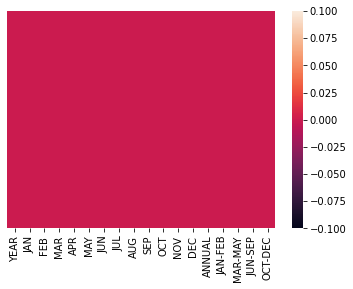

In [ ]:
sns.heatmap(temp.isnull(),yticklabels=False,cbar=True)  


Preprocessing if needed 
* filling missing values (if there) with mean
* dropping columns if it has 50% of missing values





In [ ]:
#temp['JAN']=temp['JAN'].fillna(temp['JAN'].mean())

#temp.drop(['JAN'],axis=1,inplace=True)
#temp.head()

Analysis

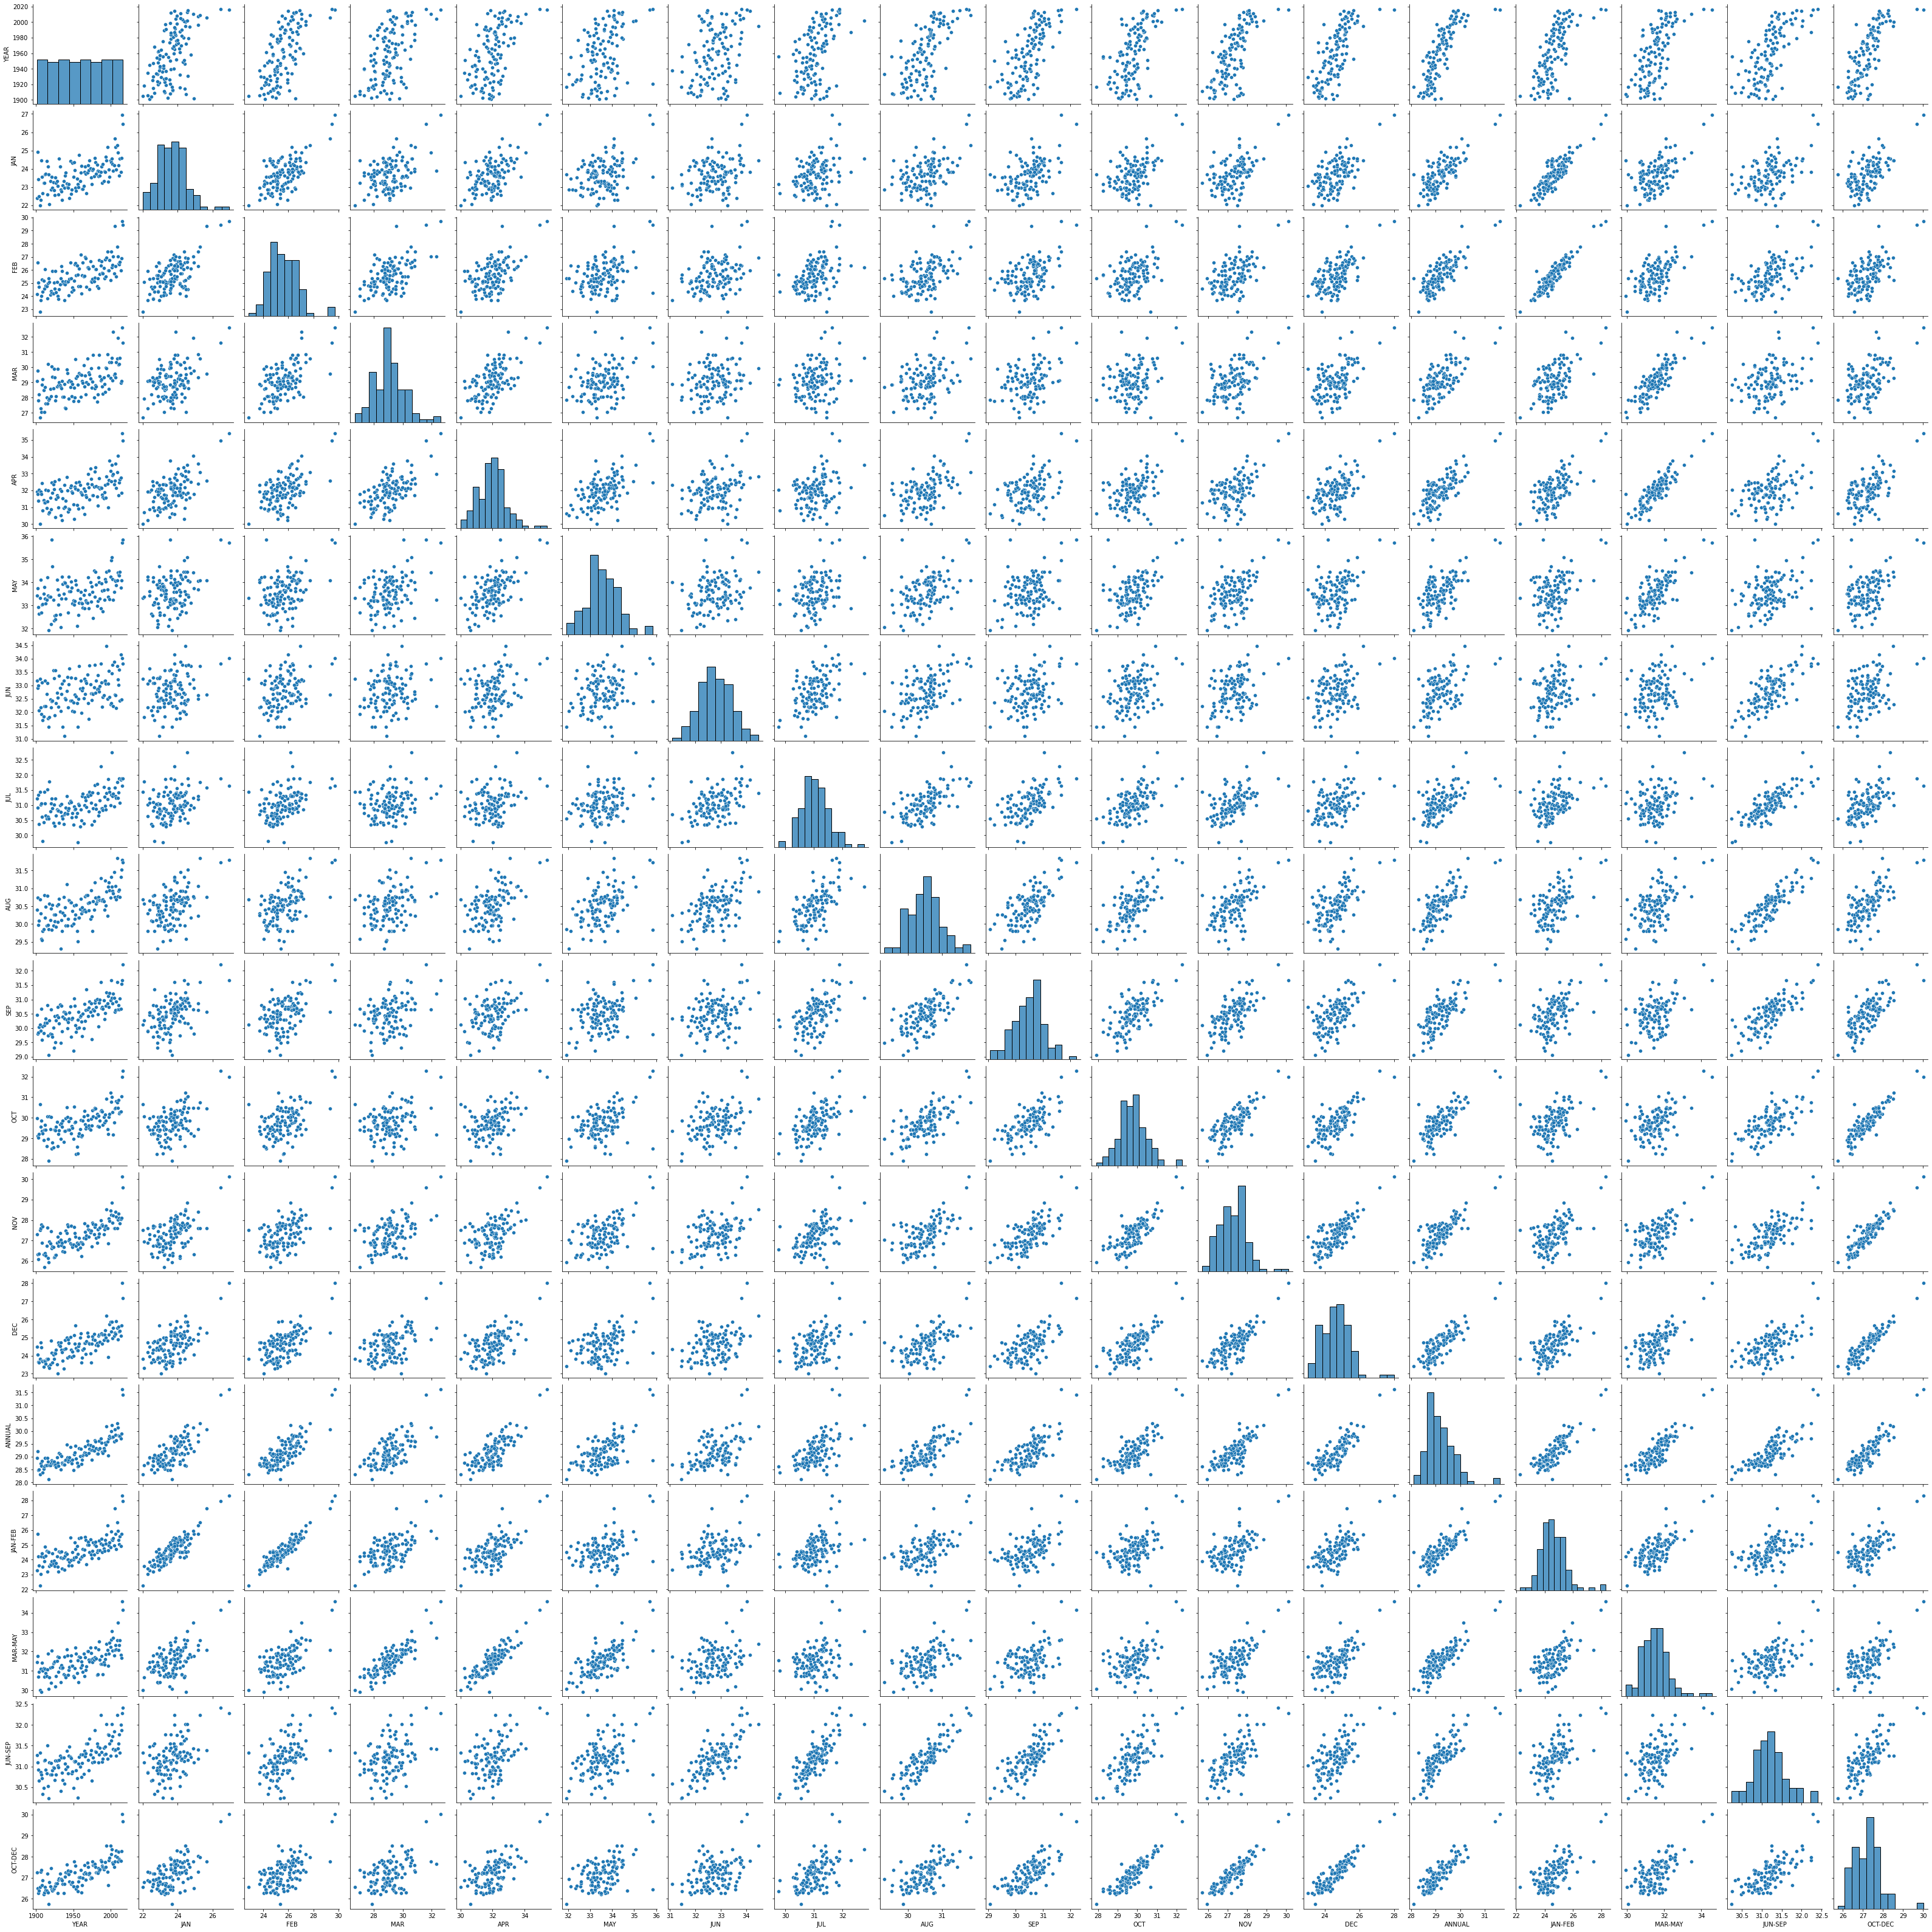

In [ ]:
sns.pairplot(temp)

In [ ]:
temp.corr()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
YEAR,1.000000,0.575499,0.647066,0.553886,0.540662,0.407648,0.371840,0.478512,0.654138,0.664008,0.589073,0.697887,0.732222,0.801129,0.679869,0.640438,0.677061,0.749792
JAN,0.575499,1.000000,0.647017,0.457081,0.594674,0.365236,0.292855,0.339337,0.459944,0.499764,0.480695,0.526615,0.595902,0.749880,0.874226,0.575734,0.496515,0.607752
FEB,0.647066,0.647017,1.000000,0.589088,0.548803,0.377722,0.341302,0.418956,0.503188,0.472755,0.466916,0.519595,0.619320,0.792541,0.928731,0.635904,0.544527,0.609839
MAR,0.553886,0.457081,0.589088,1.000000,0.618621,0.387756,0.228349,0.232647,0.382344,0.370066,0.312226,0.498202,0.523316,0.689205,0.584612,0.848637,0.380640,0.505879
APR,0.540662,0.594674,0.548803,0.618621,1.000000,0.563317,0.299866,0.286052,0.490668,0.437970,0.473873,0.538037,0.579775,0.770596,0.643942,0.878402,0.474542,0.596943
MAY,0.407648,0.365236,0.377722,0.387756,0.563317,1.000000,0.274521,0.299072,0.473171,0.347289,0.468993,0.482822,0.444695,0.609015,0.403316,0.708221,0.431314,0.503445
JUN,0.371840,0.292855,0.341302,0.228349,0.299866,0.274521,1.000000,0.480925,0.504354,0.305761,0.380782,0.419968,0.366242,0.520189,0.351115,0.341301,0.749132,0.409325
JUL,0.478512,0.339337,0.418956,0.232647,0.286052,0.299072,0.480925,1.000000,0.622985,0.531865,0.568341,0.535413,0.440813,0.588454,0.423876,0.321388,0.799602,0.541023
AUG,0.654138,0.459944,0.503188,0.382344,0.490668,0.473171,0.504354,0.622985,1.000000,0.680212,0.661177,0.588961,0.595330,0.755384,0.534818,0.560118,0.866202,0.665040
SEP,0.664008,0.499764,0.472755,0.370066,0.437970,0.347289,0.305761,0.531865,0.680212,1.000000,0.680744,0.683866,0.629223,0.730756,0.529533,0.485397,0.778875,0.734650


Till file creation

JAN
1.2589823934553692
[-2.57511034e-04 -8.81460862e-01  7.49819755e-03 -7.00019087e-02
  3.10310796e-02  1.29340283e-01  5.20184014e-02  4.67667631e-02
  9.42384941e-02  9.28440043e-02  7.98388183e-02  6.33808045e-02
  2.17387629e+00  1.47108191e+00 -4.88428930e-01 -1.10007624e+00
 -7.40325072e-01]
MAE 0.10844481062247298
MSE 0.043944689363899815
FEB
0.43083908541853333
[-2.04625912e-04 -9.70589891e-01  1.13645706e-01 -7.91216485e-02
  1.38615732e-01  8.56579131e-02  3.14590850e-02  8.56595328e-03
  5.84505853e-02  1.45824906e-01  6.16835007e-02  9.44258887e-02
  2.11986930e+00  1.59969648e+00 -6.83015277e-01 -9.30080071e-01
 -7.99567542e-01]
MAE 0.09266666153639314
MSE 0.015245097511579986
MAR
-0.4868923650187007
[-1.14505513e-03  1.56873513e+00  1.60545072e+00 -9.02713572e-01
 -6.71658084e-01 -5.06405802e-01 -1.76531554e-01 -4.98935795e-01
 -4.65997274e-01 -5.01848847e-01 -2.56204889e-02 -1.80956544e-01
  4.89068149e-01 -3.20503926e+00  2.60865989e+00  1.49032072e+00
  4.60839955e-0

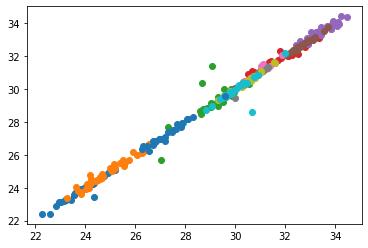

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import csv
#x_train=temp[['YEAR','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL','JAN-FEB','MAR-MAY','JUN-SEP','OCT-DEC']]
#x_train=temp.drop(['JAN'], axis=1 ,inplace = False)
#y_train=temp['JAN']
with open("/content/gdrive/MyDrive/monthwise.csv",'w',newline="") as outFile:
  writer=csv.writer(outFile)
  list1=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
  for month in list1:
    features=[]
    print(month)
    x_train=temp.drop(month, axis=1 ,inplace = False)
    y_train=temp[month]
    x_train, x_test , y_train, y_test = train_test_split(x_train , y_train , test_size=0.2)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    print(lm.intercept_)
    print(lm.coef_)
    coeff=pd.DataFrame(lm.coef_, columns=['Coefficient'])
    #print(coeff)
    pred=lm.predict(x_test)
    plt.scatter(y_test, pred)
    from sklearn import metrics
    print('MAE', metrics.mean_absolute_error(y_test,pred))
    print("MSE", metrics.mean_squared_error(y_test,pred))

    features.append(month)
    features.append(metrics.mean_absolute_error(y_test,pred))
    features.append(metrics.mean_squared_error(y_test,pred))
    writer.writerow(features)
print(pred)
print(y_test)


Without loop

-0.028586694774670462
[ 3.23818835e-04 -8.45739372e-01 -1.89813998e-02 -9.13859497e-02
  8.97060121e-03 -1.14313845e-01 -1.89724714e-01 -2.27235501e-01
 -1.59462549e-01  1.64147451e-01  1.04302191e-01  1.01767963e-01
  2.00122964e+00  1.45806904e+00 -3.51212840e-01 -2.72146334e-02
 -8.56623444e-01]
MAE 0.10617874944092026
MSE 0.038681216133114545
[23.16605805 23.85627835 25.07028597 23.83555982 23.62742195 23.76717708
 23.20631496 24.60814147 23.24831096 24.55718497 24.55272508 23.11664484
 23.38012135 22.58812855 26.45983135 23.08241885 24.68056868 23.21900003
 22.96362256 23.52109685 23.54636183 25.24317061 24.30244851 23.21206596
 25.69121696 22.92749502 24.42015528 22.96583837 24.17228605 22.5116778
 23.97920525 23.78330735 24.94309356 22.5327427  23.20056236 24.17361754]
10     23.22
59     23.78
95     25.18
91     23.84
7      23.57
86     23.81
26     23.23
112    24.56
22     23.25
94     24.44
101    24.56
2      23.44
50     24.36
24     22.56
116    26.45
62     22.90
93   

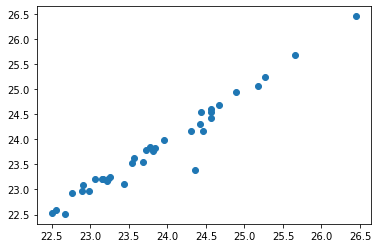

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#x_train=temp[['YEAR','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL','JAN-FEB','MAR-MAY','JUN-SEP','OCT-DEC']]
x_train=temp.drop(['JAN'], axis=1 ,inplace = False)
y_train=temp['JAN']

list1=[ ]
x_train, x_test , y_train, y_test = train_test_split(x_train , y_train , test_size=0.3,random_state=0)
lm=LinearRegression()

lm.fit(x_train,y_train)
print(lm.intercept_)
print(lm.coef_)

coeff=pd.DataFrame(lm.coef_, columns=['Coefficient'])
#print(coeff)
pred=lm.predict(x_test)
plt.scatter(y_test, pred)

from sklearn import metrics
print('MAE', metrics.mean_absolute_error(y_test,pred))
print("MSE", metrics.mean_squared_error(y_test,pred))
print(pred)
print(y_test)
